**`Coursera final project`**

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [71]:
boston_df=pd.read_csv("boston_house_prices.csv")
boston_df.columns = boston_df.iloc[0]
boston_df = boston_df.drop(index=0)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2


The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

"For the median value of owner-occupied homes, provide a boxplot to visualize the distribution of the data."

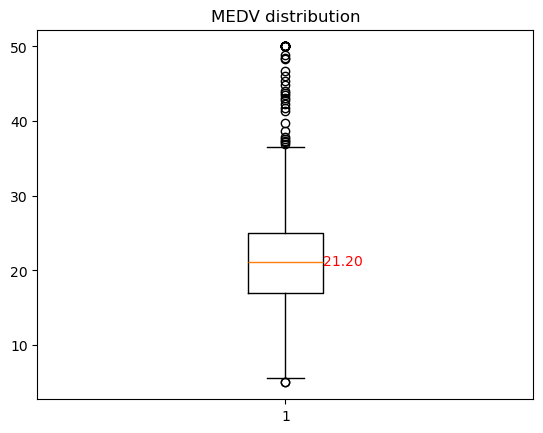

In [72]:
medv = boston_df["MEDV"]
medv.head()
# Convert series to a numeric value so we can input it into box plot
numeric_medv = pd.to_numeric(medv, errors='coerce').dropna()
# Get median value
median_value = numeric_medv.median()
box = plt.boxplot(numeric_medv.values)
median_line = box['medians'][0]
# Get the x and y coordinates of the median line
median_x = median_line.get_xdata()[1]
median_y = median_line.get_ydata()[0]
# Add text annotation for the median value
plt.text(median_x, median_y, f'{median_value:.2f}', 
         verticalalignment='center', horizontalalignment='left',
         fontsize=10, color='red')

# Add labels and a title (optional)
plt.title('MEDV distribution')

# Step 6: Display the plot
plt.show()

The median value of MEDV (Median value of owner-occupied homes) is approximately 21.2, marking the middle of the distribution. However, there is a noticeable portion of data above the third quartile (Q3), pointing to the existence of some higher-valued properties in the dataset.

`Provide a  bar plot for the Charles river variable`

CHAS
0    471
1     35
Name: count, dtype: int64


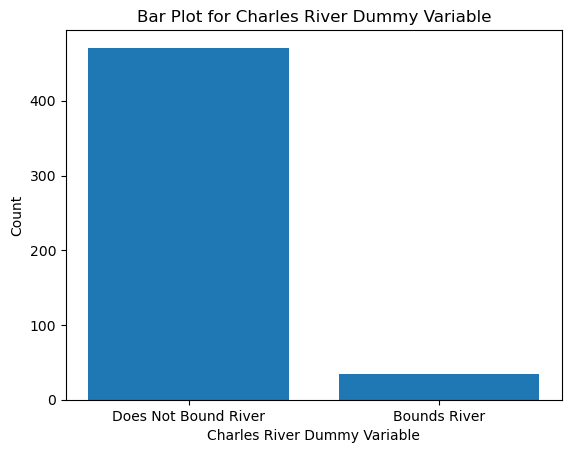

In [73]:
chas_series = boston_df["CHAS"]
chas_occurences = chas_series.value_counts()
print(chas_occurences)

plt.bar(chas_occurences.index, chas_occurences.values)
# Step 5: Customize the plot
plt.xlabel('Charles River Dummy Variable')
plt.ylabel('Count')
plt.title('Bar Plot for Charles River Dummy Variable')
plt.xticks([0, 1], ['Does Not Bound River', 'Bounds River'])

# Step 6: Display the plot
plt.show()

This bar plot shows us the distribution of Houses that are bound to the river in comparison to the ones that do not bound to the river

`Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)`

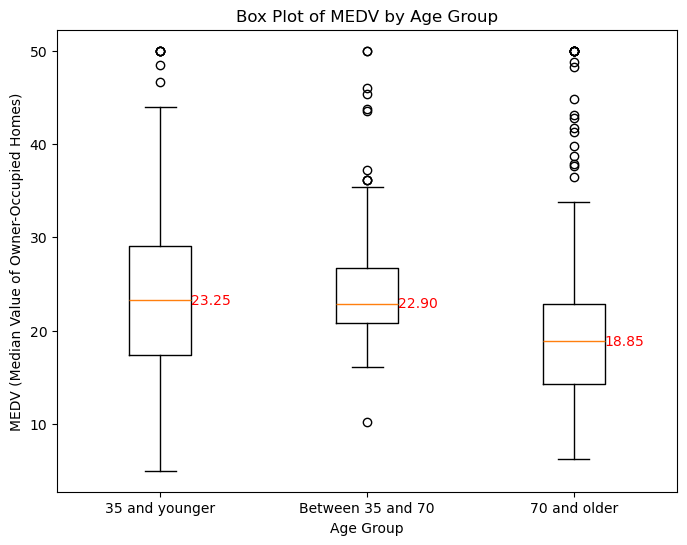

In [96]:
age_bins = [0, 35, 70, boston_df['AGE'].max()]
age_labels=['35 and younger', 'Between 35 and 70', '70 and older']
boston_df['age_groups'] = pd.cut(boston_df['AGE'], bins=age_bins, labels=age_labels)
# Group data into age groups:
medv_data = []
for name, group in boston_df.groupby('age_groups', observed=False):
    # Extract the MEDV data for the group
    medv_group = group['MEDV']
    # Convert the MEDV data to numeric types (if needed) and drop NaN values
    medv_group = pd.to_numeric(medv_group, errors='coerce').dropna()
    # Append to medv_data
    medv_data.append(medv_group)

#Create the box plot
plt.figure(figsize=(8, 6))
boxplot = plt.boxplot(medv_data, labels=age_labels)

for i, median_line in enumerate(boxplot['medians']):
    # Get the median value from the data
    median_value = medv_data[i].median()
    
    # Get the x and y coordinates of the median line
    median_x = median_line.get_xdata()[1]
    median_y = median_line.get_ydata()[0]
    
    # Add text annotation for the median value
    plt.text(median_x, median_y, f'{median_value:.2f}', 
             verticalalignment='center', horizontalalignment='left',
             fontsize=10, color='red')

plt.xlabel('Age Group')
plt.ylabel('MEDV (Median Value of Owner-Occupied Homes)')
plt.title('Box Plot of MEDV by Age Group')

# Step 7: Display the plot
plt.show()


As the age of the homes increases, the median value of owner-occupied homes (medv) tends to decrease

`Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?`

Text(0.5, 0, 'proportion of non-retail business acres per town')

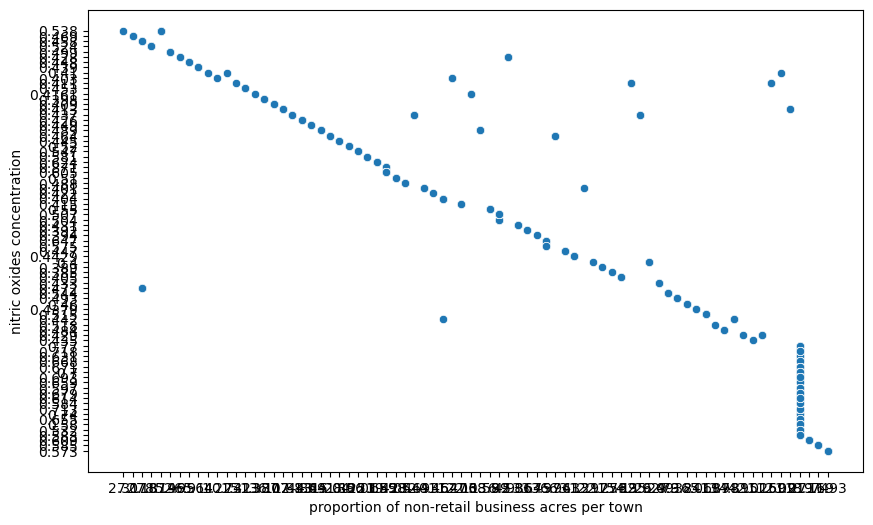

In [112]:
# INDUS vs NOX
plt.figure(figsize=(10, 6))

# Create a scatter plot using seaborn
# x-axis represents the nitric oxides concentration in the air (nox)
# y-axis represents the proportion of non-retail business acres per town (indus)
sns.scatterplot(x=boston_df['INDUS'], y=boston_df['NOX'])

# Label the x-axis as 'nitric oxides concentration' for clarity
plt.ylabel('nitric oxides concentration')

# Label the y-axis as 'proportion of non-retail business acres per town' for clarity
plt.xlabel('proportion of non-retail business acres per town')


We see correlation with increasing nox increases indus

To create a histogram for the pupil-to-teacher ratio variable in your dataset.

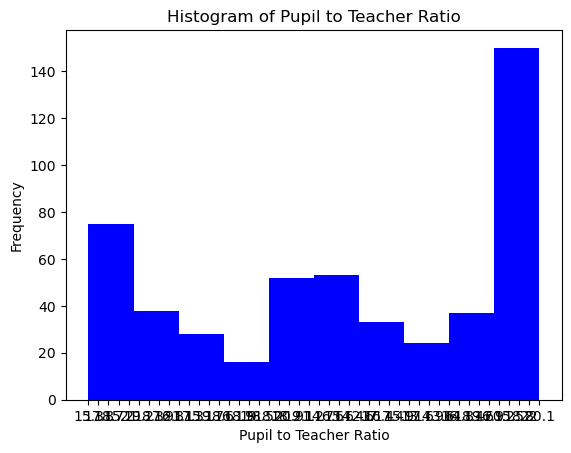

In [116]:

# Create a histogram for the pupil-to-teacher ratio variable (ptratio)
plt.hist(boston_df['PTRATIO'],  color='blue')

# Add labels and title
plt.title('Histogram of Pupil to Teacher Ratio')
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Frequency')

# Display the plot
plt.show()


`Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)`

In [123]:
alpha = 0.05

In [182]:
boston_df['CHAS'] = boston_df['CHAS'].astype(float)
boston_df['MEDV'] = boston_df['MEDV'].astype(float)
t_stat, p_val = stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'], boston_df[boston_df['CHAS'] == 0]['MEDV'])
print("T-Statistic:", t_stat)
print("P-Value:", p_val)
if p_val < alpha:
    print("There is significant difference")
else:
    print("There is no significant difference")

T-Statistic: 3.996437466090509
P-Value: 7.390623170519905e-05
There is significant difference


Thx to t-test we define that there are no significant difference

`Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)`

In [180]:
# Group data by age groups and get medv values for each group
boston_df['AGE'] = boston_df['AGE'].astype(float)
boston_df['MEDV'] = boston_df['MEDV'].astype(float)
gd = [boston_df[boston_df['AGE'] == age_group]['MEDV'] for age_group in boston_df['AGE'].unique()]

# Perform one-way ANOVA test
f_stat, p_val = stats.f_oneway(*gd)

# Print F-statistic and p-value
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_val}")

# Determine whether there is a significant difference in medv across age groups
if p_val < alpha:
    print("There is a significant difference in median value of owner-occupied homes across age groups.")
else:
    print("There is no significant difference in median value of owner-occupied homes across age groups.")


F-Statistic: 0.9840091646131573
P-Value: 0.5539698276810093
There is no significant difference in median value of owner-occupied homes across age groups.


Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

In [179]:
boston_df['NOX'] = boston_df['NOX'].astype(float)
boston_df['INDUS'] = boston_df['INDUS'].astype(float)
# Calculate the Pearson correlation coefficient and p-value between 'nox' and 'indus'
correlation_coefficient, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Display the results
print(f"Pearson coeff: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Define the significance level (alpha)
alpha = 0.05

# Determine whether there is a significant difference between 'nox' and 'indus'
if p_value < alpha:
    print("There is a significant relationship between NOX and INDUS.")
else:
    print("There is no significant relationship between NOX and INDUS.")


Pearson coeff: 0.7636514469209149
P-value: 7.913361061242812e-98
There is a significant relationship between NOX and INDUS.


What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

In [178]:
import statsmodels.api as sm
boston_df['DIS'] = boston_df['DIS'].astype(float)
boston_df['MEDV'] = boston_df['MEDV'].astype(float)

X = boston_df['DIS']
Y = boston_df['MEDV']
# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(Y, X)
results = model.fit()
# Print the summary of the regression results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 02 May 2024   Prob (F-statistic):           1.21e-08
Time:                        15:22:10   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0